In [1]:
import pandas as pd
from sklearn.datasets import load_boston
import re
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
# Описание данных
print(boston["DESCR"])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
# Выделяем названия признаков по шаблону
print(re.findall("- [A-Z]* ", boston["DESCR"]))
features = [feature[2:-1] for feature in re.findall("- [A-Z]* ", boston["DESCR"])]

['- CRIM ', '- ZN ', '- INDUS ', '- CHAS ', '- NOX ', '- RM ', '- AGE ', '- DIS ', '- RAD ', '- TAX ', '- PTRATIO ', '- B ', '- LSTAT ', '- MEDV ']


In [6]:
X_tr, X_te, y_tr, y_te = train_test_split(boston["data"], boston["target"])

In [7]:
data_train = pd.DataFrame(X_tr, columns=features[:-1])
data_test = pd.DataFrame(X_te, columns=features[:-1])

In [8]:
data_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,13.07510,0.0,18.10,0.0,0.580,5.713,56.7,2.8237,24.0,666.0,20.2,396.90,14.76
1,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93
2,0.13058,0.0,10.01,0.0,0.547,5.872,73.1,2.4775,6.0,432.0,17.8,338.63,15.37
3,7.52601,0.0,18.10,0.0,0.713,6.417,98.3,2.1850,24.0,666.0,20.2,304.21,19.31
4,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00


In [11]:
data_train["target"] = y_tr

In [9]:
feat = 'CRIM'

In [10]:
data_train.shape,y_tr.shape

((379, 13), (379,))

In [13]:
quals= []
data_train.sort_values(feat, inplace=True)
for i in range(data_train.shape[0]+1):
    left = data_train["target"][:i]
    right = data_train["target"][i:]
    qual = len(left)/len(data_train)*left.var()+\
            (1-i/len(data_train))*right.var()
    quals.append(qual)
plt.legend()    

In [14]:
from matplotlib import pyplot as plt
%matplotlib inline


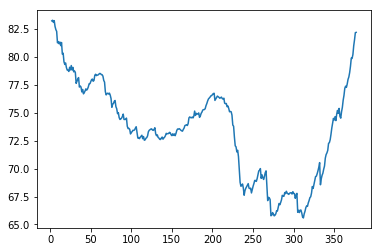

In [15]:
plt.plot(quals)